In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('L:/analysis_nima/Python Scripts') #changing directory to ETL.py folder

from Analyses_ import ETL
from Analyses_ import Plot
from Analyses_ import activation
from Analyses_ import run_per_mouse
from Analyses_ import raster_plot
from Analyses_ import run_per_mouse_concatinated
from Analyses_ import epoch_duration
from Analyses_ import Triplet
from Analyses_ import findseq
from Analyses_ import select_subpopulation
from Analyses_ import transition
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.__version__
import copy

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Inputs

###  Defining artifacts

In [2]:
# defining artifacts
custom_artifacts_1 = [[11007,11008,4]]
custom_artifacts_2 = [[11630,11947,0],[12000,12700,0],[4533,5154,14]]
custom_artifacts_3 = []
custom_artifacts_4 = [[1595,1845,0],[4609,4907,0],[7740,7983,0],[13795,14101,0],[16706,16973,0],
             [7266,7501,1],[11912,12219,1],[12703,13203,1],[13730,13909,1],[15097,15559,1],[17277,17519,1],
             [1416,1793,2],[3816,4123,2],[13254,13593,2],[15224,15703,2],[17668,18067,2],
             [7358,7521,3],[10240,10253,3],[13672,13748,3],[17306,17593,3],
             [5505,5939,4],[6222,6231,4],[16760,16820,4],[18450,18573,4],                           
             [1132,1357,7],[8653,8776,7],[9946,10391,7],
             [9068,9323,7],[13589,13623,7],[17394,17547,7],
             [1,140,8],[908,965,8],[7638,7665,8],[8014,8027,8],[14726,14922,8],[18022,18187,8],
             [1912,2381,9],[2920,2923,9],[7767,7819,9],[7864,7997,9],[9876,10197,9],[15206,15545,9],
             [6734,7220,10],[9668,9939,10],
             [8914,9290,11],[9562,9571,11],[12216,12339,11],
             [11492,11553,12],[13898,13919,12],
             [6298,6619,13],[12282,12795,13],[14406,14507,13],[14798,14875,13],
             [1,220,14],[1878,2108,14],[9872,9961,14],
             [4764,4813,15],[5564,5571,15],[15419,15595,15],[16003,16089,15],[16420,16482,15],
             [4240,4403,16],[9975,10077,16],[10274,10275,16],[13228,13451,16],[13805,13939,16],[14620,14664,16],[15764,15857,16],[18430,18537,16],
             [10425,10591,17],[11058,11709,17],[12232,12311,17],[12784,12804,17],[17000,17115,17],
             [10655,10825,18],[11993,12075,18],[12648,12685,18],[16013,16134,18],
             [14466,15015,19],[16876,17009,19],[18398,18573,19],
            [628,958,23],[7822,7976,23],[10298,10435,23],[13899,14241,23],[14466,14537,23],[15773,15848,23],[17664,17925,23],[18291,18426,23],
            [4309,4512,24],[5271,5467,24],[6450,6700,24],[7186,7593,24],
            [460,700,25],[1714,1725,25],[4045,4153,25],[13600,13699,25],
            [4434,4568,26],[5984,6167,26],
            [1770,1831,27],[4060,4064,27],
            [2000,2193,28],[11098,11334,28],
            [5921,5997,30],[8200,8210,30],[9189,9191,30],
            [686,852,31],[13375,13543,31],[14059,14334,31],[15808,15883,31],
            [10760,10800,33],[13942,14061,33],[17672,17738,33],
            [10576,10604,41]]
custom_artifacts_5 = [[3928,3971,0],[4584,4656,0],[7001,7119,0],[14144,14230,0],[14466,14501,0],[15591,15593,0],
            [559,603,1],[2187,2214,1],[3999,4054,1],[11749,11790,1],[17785,17839,1],
            [3403,3491,2],[11936,11980,2],
            [1397,1465,3],[13881,13889,3],[14510,14526,3],[18377,18441,3],                                                                                           
            [2585,2635,4], [6722,6771,4],[10867,10897,4],[16543,16615,4],
            [740,825,5],[2026,2113,5],[13025,13051,5],
            [798,863,6],[1795,1857,6],[3949,3980,6],[5190,5244,6],[10480,10547,6],[11219,11301,6],[12144,12191,6],[12690,12747,6],
            [1343,1441,7],[2618,2684,7],[2709,2713,7],[3427,3496,7],[4138,4185,7],[4532,4567,7],[5694,8768,7],[9513,9562,7],[12510,12644,7],[15000,15073,7],
            [96,140,8],[4175,4258,8],
            [409,564,9],[13291,13497,9],[16520,18573,9],
            [9968,10026,10],[14269,14335,10],[16569,16616,10],
            [404,557,11],[12553,12649,11],
            [503,598,13],[2832,2889,13],[13151,13218,13],[18276,18343,13],
            [769,954,14],[980,1001,14],[2324,2389,14],[4286,4297,14],
            [3349,3447,15],[6128,6221,15],
            [8475,8543,16],
            [9792,9840,17],
            [2984,3007,20],[4131,4183,20],[5025,5042,20],[6330,6355,20],[11818,11893,20],
            [6760,6875,21],
            [12871,12895,28],[13645,13667,28],[14232,14319,28],[14837,14849,28],[15521,15542,28],[16421,16445,28],[17032,17040,28]]
custom_artifacts_6 = [[8863,9191,4],
           [5389,5393,7],[5575,5607,7],[5754,5755,7],[5798,6000,7],
            [11050,11070,10],[12260,12280,10],
            [15125,15290,12],[16420,18160,10],
            [13280,13340,13],
            [8,23,15],[92,94,15],[481,505,15],
            [10035,10500,20],[11024,11044,20],
            [5794,5800,21],
            [3501,3507,22]]
custom_artifacts_7 = [[0,3418,0],[13116,13507,0],[14502,14872,0],
              [8000,9000,2],
              [1828,2638,3],[8631,12630,3],
              [1497,1988,4],[16470,17270,4],
              [5113,8239,5],                                                                                         
              [2322,2978,6],
              [12460,14890,7],
              [15600,16060,10],
              [4231,4848,11],[6434,6909,11],[9110,11550,11],
              [11890,12380,12],
              [8410,8820,13],
              [3026,3515,14],[13810,14170,14],
              [10910,12010,15]]               

### removing cells

In [3]:
remove_cell_1 = []
remove_cell_2 = []
remove_cell_3 = [62,63,64,65,66,67,68,69,70,80,81,160,161,162,163,164,167,194,195,202,203,204]
remove_cell_4 = [13,53,55,57,79,84,85,86,95,99,112,141,144,147,153,177,178,183,184,188,189,191,196,197,198,199,202,219,226,234,235]
remove_cell_5 = []
remove_cell_6 = [66,84,85,86]
remove_cell_7 = []

### sampling frequency

In [4]:
# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576, 30.995]

### data address

In [5]:
all_address = ['L:/analysis_nima/250520_m18a/Batch_4', 'L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2',
                'L:/analysis_nima/110620_m18b/new/Batch_3', 'L:/analysis_nima/050820_m21a/Batch_4',
                'L:/analysis_nima/030720_m20a/Batch_3', 'L:/analysis_nima/291020_m23a/Batch_2', 
               'L:/analysis_nima/210121_m24a/Batch_1']

In [6]:
# adress for saving final picture
picture_adress = False # address or False

# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576, 30.995]

# list of artifacts for mice 
artifacts = [custom_artifacts_1, custom_artifacts_2, custom_artifacts_3,
            custom_artifacts_4, custom_artifacts_5, custom_artifacts_6, custom_artifacts_7]

# list of cells need to be removed
remove_cell = [remove_cell_1, remove_cell_2, remove_cell_3,
              remove_cell_4, remove_cell_5, remove_cell_6, remove_cell_7]

# average firing rate and average amplitude analyses

In [7]:
average_all = [run_per_mouse_concatinated(sf_=sfs[i], ending_='.mat', unit_lenght_=600, address_= all_address[i], set_artifacts_=artifacts[i], fr_zeros = False) for i in range(len(sfs))]

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18597, 45) and Data 

L:\analysis_nima\Python Scripts\Analyses_.py:155: RuntimeWarning: invalid value encountered in true_divide
  axis = 0) / np.sum(np.where(data_sws > 0, 1, 0), axis = 0)
L:\analysis_nima\Python Scripts\Analyses_.py:168: RuntimeWarning: invalid value encountered in true_divide
  1, 0), axis = 0)
L:\analysis_nima\Python Scripts\Analyses_.py:183: RuntimeWarning: invalid value encountered in true_divide
  axis = 0) / np.sum(np.where(data_awake > 0, 1, 0), axis = 0)


output = sws, rem , awake
output = sws, rem , awake
Your entered path is L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat']  Number of all files 31
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 294 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18597, 31) and Data shape (18597, 294, 31)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 294, 31)
setting artif

output = sws, rem , awake
output = sws, rem , awake
Your entered path is L:/analysis_nima/030720_m20a/Batch_3
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 185 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18597, 29) and Data shape (18597, 185, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18597, 185, 29)
setting artifacts for file 0
Artifact indices will be appl

output = sws, rem , awake
output = sws, rem , awake
Your entered path is L:/analysis_nima/291020_m23a/Batch_2
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat']  Number of all files 23
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18574 samples, number of cells are 87 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18574, 23) and Data shape (18574, 87, 23)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23)
setting artifacts for file 4
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18574, 87, 23)
setting artifacts for file

In [8]:
# cleaning cells
average_all_cellremoved = []
for i, mouse in enumerate(average_all):
    print(f'cells {remove_cell[i]} are removed from mouse {i}')
    temp = []
    for ii, cal in enumerate(mouse):
        
        temp.append(np.delete(cal, remove_cell[i]))
    
    average_all_cellremoved.append(temp)    

cells [] are removed from mouse 0
cells [] are removed from mouse 1
cells [62, 63, 64, 65, 66, 67, 68, 69, 70, 80, 81, 160, 161, 162, 163, 164, 167, 194, 195, 202, 203, 204] are removed from mouse 2
cells [13, 53, 55, 57, 79, 84, 85, 86, 95, 99, 112, 141, 144, 147, 153, 177, 178, 183, 184, 188, 189, 191, 196, 197, 198, 199, 202, 219, 226, 234, 235] are removed from mouse 3
cells [] are removed from mouse 4
cells [66, 84, 85, 86] are removed from mouse 5
cells [] are removed from mouse 6


### Prepare Data for Statistics

In [19]:
stats_address = False # or give proper address




df_frequency = pd.DataFrame(columns=['Awake', 'SWS', 'REM', 'mouse_nr'])
df_amplitude = pd.DataFrame(columns=['Awake', 'SWS', 'REM', 'mouse_nr'])

for i, _ in enumerate(average_all_cellremoved):
    
    fr_dict = {}
    fr_dict = {'Awake':average_all_cellremoved[i][2], 
               'SWS': average_all_cellremoved[i][0], 
               'REM': average_all_cellremoved[i][1], 
               'mouse_nr': i+1}
    df_frequency = df_frequency.append(pd.DataFrame(fr_dict), ignore_index=True)
    
    amp_dict = {}
    amp_dict = {'Awake':average_all_cellremoved[i][5], 
               'SWS': average_all_cellremoved[i][3], 
               'REM': average_all_cellremoved[i][4], 
               'mouse_nr': i+1}
    df_amplitude = df_amplitude.append(pd.DataFrame(amp_dict), ignore_index=True)
    
    print(f'creating dataframe for mouse {i+1}')
    
print('NaNs are droped ...!')
df_amplitude = df_amplitude.dropna()
df_frequency = df_frequency.dropna()

if stats_address:
    df_amplitude.to_csv(stats_address + '\Amplitude.csv')
    print('amplitude dataframe is saved..')
    df_frequency.to_csv(stats_address + '\Frequency.csv')
    print('frquency dataframe is saved..')



creating dataframe for mouse 1
creating dataframe for mouse 2
creating dataframe for mouse 3
creating dataframe for mouse 4
creating dataframe for mouse 5
creating dataframe for mouse 6
creating dataframe for mouse 7
NaNs are droped ...!


### concatinating results

In [33]:
sws_fr_avg_list = []; rem_fr_avg_list = []; awake_fr_avg_list=[]
sws_amp_avg_list = []; rem_amp_avg_list = []; awake_amp_avg_list=[]

for i, _ in enumerate(average_all_cellremoved):
    
    sws_fr_avg_list.append(average_all_cellremoved[i][0])
    rem_fr_avg_list.append(average_all_cellremoved[i][1])
    awake_fr_avg_list.append(average_all_cellremoved[i][2])
    
    sws_amp_avg_list.append(average_all_cellremoved[i][3])
    rem_amp_avg_list.append(average_all_cellremoved[i][4])
    awake_amp_avg_list.append(average_all_cellremoved[i][5])
    
# stacke lists
sws_fr_avg = np.hstack(sws_fr_avg_list)
rem_fr_avg = np.hstack(rem_fr_avg_list)
awake_fr_avg = np.hstack(awake_fr_avg_list)

sws_amp_avg = np.hstack(sws_amp_avg_list)
rem_amp_avg = np.hstack(rem_amp_avg_list)
awake_amp_avg = np.hstack(awake_amp_avg_list)


# Plotting

### dot plot

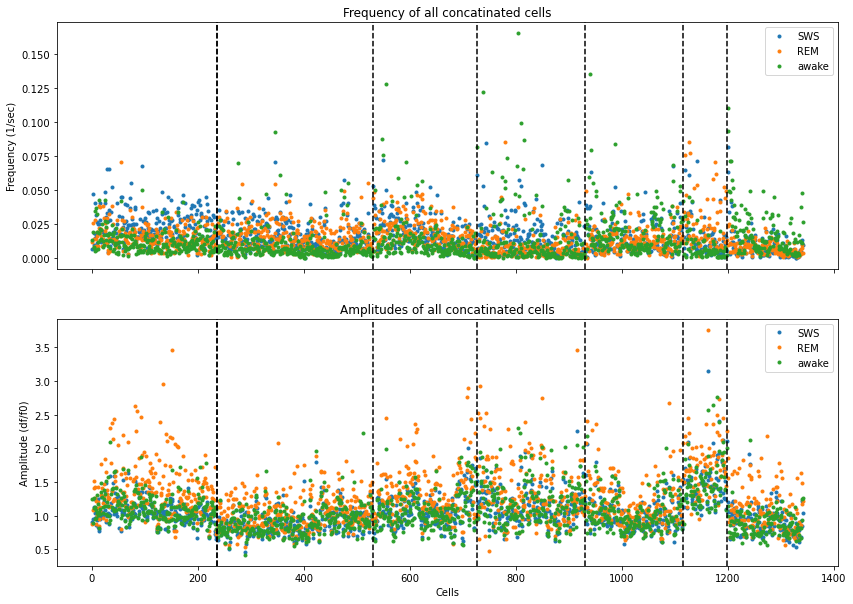

In [10]:
# plotting traces
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True)

save_address = False
     

ax[0].plot(sws_fr_avg,'.', label = 'SWS')
ax[0].plot(rem_fr_avg,'.', label = 'REM')
ax[0].plot(awake_fr_avg,'.', label = 'awake')
ax[0].set_title('Frequency of all concatinated cells')
ax[0].set_ylabel('Frequency (1/sec)')
ax[0].legend()

for i in range(len(sws_fr_avg_list)):
    if i==0:
        ax[0].axvline(x=len(sws_fr_avg_list[i]) , ls = '--', color = 'k')
    else:
        ax[0].axvline(x=len(np.hstack(sws_fr_avg_list[:i])) , ls = '--', color = 'k')


ax[1].plot(sws_amp_avg,'.', label = 'SWS')
ax[1].plot(rem_amp_avg,'.', label = 'REM')
ax[1].plot(awake_amp_avg,'.', label = 'awake')
ax[1].set_title('Amplitudes of all concatinated cells')
ax[1].set_ylabel('Amplitude (df/f0)')
ax[1].set_xlabel('Cells')
ax[1].legend()

for i in range(len(sws_amp_avg_list)):
    if i==0:
        ax[1].axvline(x=len(sws_amp_avg_list[i]) , ls = '--', color = 'k')
    else:
        ax[1].axvline(x=len(np.hstack(sws_amp_avg_list[:i])) , ls = '--', color = 'k')
        
if save_address:
    fig.savefig(save_address + '/dot_plot.pdf', dpi=300, format='pdf')

## State dependent distribution
    

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<Figure size 720x720 with 0 Axes>

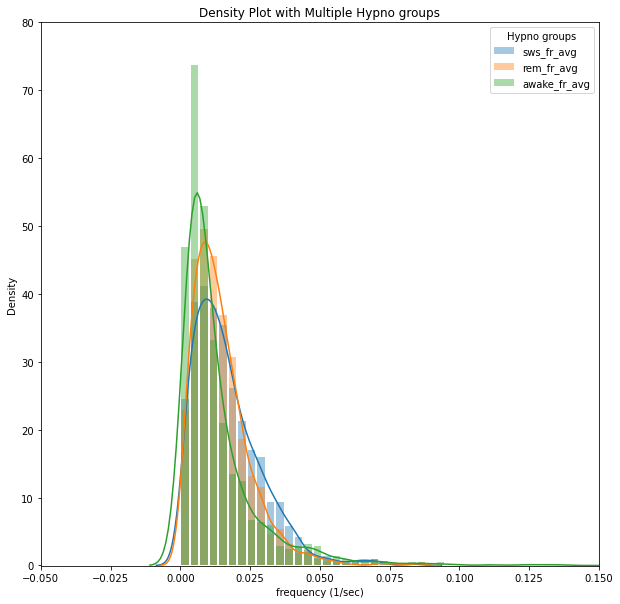

In [34]:
## Histogram for frequency

plot_ = Plot(x=sws_fr_avg,y=rem_fr_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address='L:/analysis_nima/figure_new_new_new_analysis/histogram')
plot_.marginal_dist(awake_=True, bins_=np.linspace(0,.2,60), 
                    range_=[[-.05, .15], [-.05, 80]], density_=True, 
                    kde_=True, name_='frequency (1/sec)')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<Figure size 720x720 with 0 Axes>

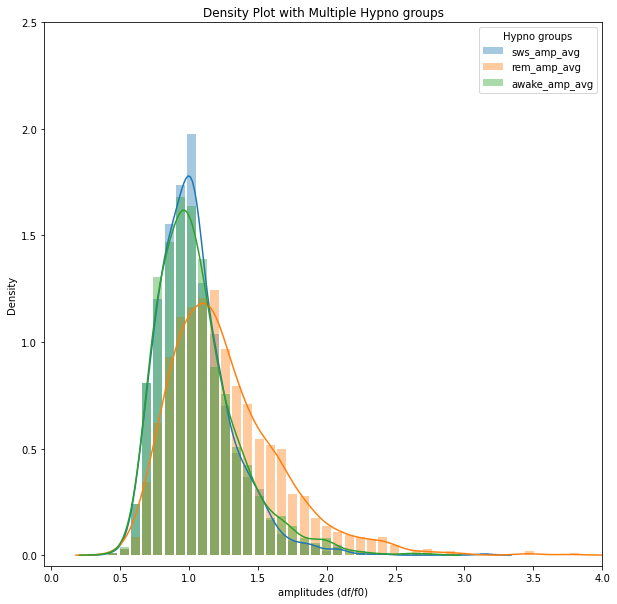

In [36]:
## Histogram for Amplitude
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address='L:/analysis_nima/figure_new_new_new_analysis/histogram')
plot_.marginal_dist(awake_=True, bins_=np.linspace(0,4,50), 
                    range_=[[-.05, 4], [-.05, 2.5]], density_=True, 
                    kde_=True, name_='amplitudes (df/f0)')

<Figure size 720x720 with 0 Axes>

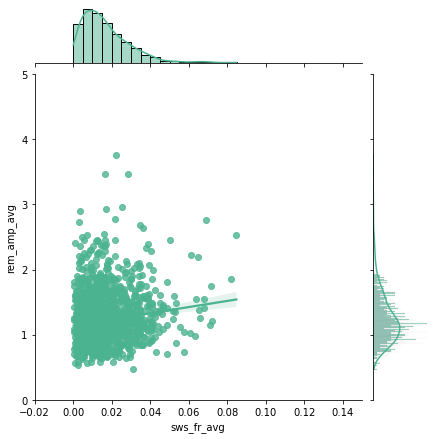

In [24]:
plot_ = Plot(x=sws_fr_avg,y=rem_amp_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.join_plotV2(bins_= np.linspace(0, 2, 400), kind_='reg', robust_ = True, xlim_= (-0.02,0.15), ylim_=(0,5))

<Figure size 720x720 with 0 Axes>

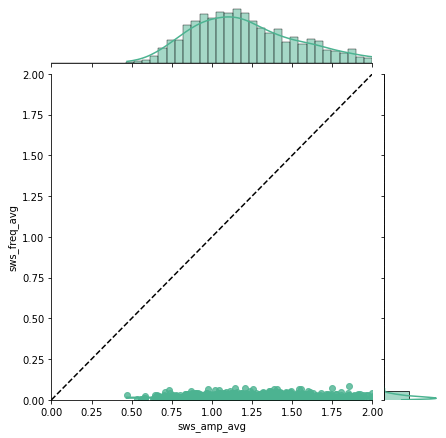

In [16]:
plot_ = Plot(x=rem_amp_avg,y=sws_fr_avg, z = awake_fr_avg, 
             xlabel='sws_amp_avg', ylabel='sws_freq_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(0, 2, 40), kind_='reg', robust_ = True)